In [2]:
# 读取spam.csv文件
import pandas as pd
df = pd.read_csv("data_spam/spam.csv", encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# 重命名数据中的v1和v2列，使得拥有更好的可读性
df.rename(columns={'v1':'Label', 'v2':'Text'}, inplace=True)
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# 把'ham'和'spam'标签重新命名为数字0和1
df['numLabel'] = df['Label'].map({'ham':0, 'spam':1})
df.head()

,Label,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4,numLabel
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,1
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0


In [5]:
# 统计有多少个ham，有多少个spam
print ("# of ham : ", len(df[df.numLabel == 0]), " # of spam: ", len(df[df.numLabel == 1]))
print ("# of total samples: ", len(df))

# of ham :  4825  # of spam:  747
# of total samples:  5572


the minimum length is:  2


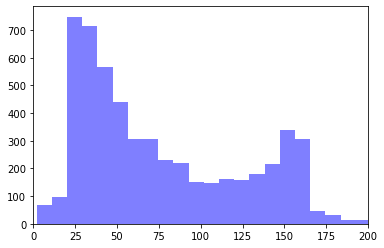

In [9]:
# 统计文本的长度信息
text_lengths = [len(df.loc[i,'Text']) for i in range(len(df))] 
print ("the minimum length is: ", min(text_lengths))

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# facecolor直方图颜色，alpha透明度
plt.hist(text_lengths, 100, facecolor='blue', alpha=0.5)
plt.xlim([0,200])
plt.show()

In [6]:
# 导入英文呢的停用词库
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# what is stop wordS? he she the an a that this ...
# 使用nltk中的英文停用词库
stopset = set(stopwords.words("english"))

# 构建文本的向量 （基于词频的表示）
# CountVectorizer特征值计算类，是一个文本特征提取方法，对于每一个训练文本，它只考虑每种词汇在该训练文本中出现的频率
# binary默认为False，一个关键词在一篇文档中可能出现n次，如果binary=True，非零的n将全部置为1，这对需要布尔值输入的离散概率模型的有用的
# vectorizer = CountVectorizer(stop_words=stopset,binary=True)
vectorizer = CountVectorizer()

# sparse matrix 
# 拟合模型，并返回文本矩阵
X = vectorizer.fit_transform(df.Text)
y = df.numLabel

In [7]:
# 把数据分成训练数据和测试数据
from sklearn.model_selection import train_test_split

# random_state随机分割训练集和测试集，并保证程序每次运行都分割一样的训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print ("训练数据中的样本个数: ", X_train.shape[0], "测试数据中的样本个数: ", X_test.shape[0])

训练数据中的样本个数:  4457 测试数据中的样本个数:  1115


In [8]:
# 利用朴素贝叶斯做训练
# Multinomial多项式
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy on test data: ", accuracy_score(y_test, y_pred))

# 打印混淆矩阵
from sklearn.metrics import confusion_matrix

# labels混淆矩阵的标签
confusion_matrix(y_test, y_pred, labels=[0, 1])

accuracy on test data:  0.97847533632287


array([[956,  14],
       [ 10, 135]])

# 以下为以上代码的完整版

# of ham :  4825  # of spam:  747
# of total samples:  5572


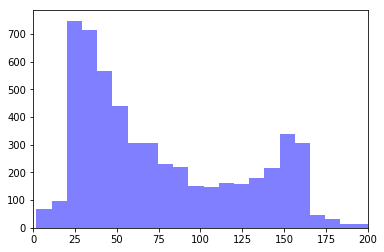

训练数据中的样本个数:  4457 测试数据中的样本个数:  1115
accuracy on test data:  0.9757847533632287


array([[952,  18],
       [  9, 136]])

In [9]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# 读取spam.csv文件
df = pd.read_csv("data_spam/spam.csv", encoding='latin')
df.head()

# 重命名数据中的v1和v2列，使得拥有更好的可读性
df.rename(columns={'v1':'Label', 'v2':'Text'}, inplace=True)
df.head()

# 把'ham'和'spam'标签重新命名为数字0和1
df['numLabel'] = df['Label'].map({'ham':0, 'spam':1})
df.head()

# 统计有多少个ham，有多少个spam
print ("# of ham : ", len(df[df.numLabel == 0]), " # of spam: ", len(df[df.numLabel == 1]))
print ("# of total samples: ", len(df))

# 统计文本的长度信息，并画出一个histogram
text_lengths = [len(df.loc[i,'Text']) for i in range(len(df))] 
plt.hist(text_lengths, 100, facecolor='blue', alpha=0.5)
plt.xlim([0,200])
plt.show()

# 导入英文的停用词库
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
# 停用词指的是：he she the an a that this ...
stopset = set(stopwords.words("english"))

# 构建文本的向量 （基于词频的表示）
vectorizer = CountVectorizer(stop_words=stopset,binary=True)
X = vectorizer.fit_transform(df.Text)
y = df.numLabel

# 把数据分成训练数据和测试数据
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
print ("训练数据中的样本个数: ", X_train.shape[0], "测试数据中的样本个数: ", X_test.shape[0])

# 利用朴素贝叶斯做训练
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB(alpha=1.0, fit_prior=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("accuracy on test data: ", accuracy_score(y_test, y_pred))

# 打印混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred, labels=[0, 1])